Нейросеть

In [ ]:
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image 

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Перевод значений пикселей в формат [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Проверка
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# Сопоставление к классам (0, 1, ..., 9)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# Создание модели нейронной сети
# Взято с того же сайта

model = keras.Sequential(
    [
    #  Входной слой
        keras.Input(shape=input_shape),
    #  Первый слой размеров в 32 нейрона в виде матрицы 3х3
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    #  Второй слой сокращающий размер матрицы до 2х2
        layers.MaxPooling2D(pool_size=(2, 2)),
    #  Третий слой размеров в 64 нейрона в виде матрицы 3х3
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    #  Четвертый слой сокращающий размер матрицы до 2х2
        layers.MaxPooling2D(pool_size=(2, 2)),
    #  Выравнивание значений
        layers.Flatten(),
    #  Обнуляет с вероятностью 0.5 для предотвращения переобучение
        layers.Dropout(0.5),
    #  Выходной слой
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 48s 113ms/step - loss: 0.3767 - accuracy: 0.8849 - val_loss: 0.0874 - val_accuracy: 0.9770
Epoch 2/15
422/422 [==============================] - 47s 111ms/step - loss: 0.1187 - accuracy: 0.9637 - val_loss: 0.0596 - val_accuracy: 0.9830
Epoch 3/15
422/422 [==============================] - 45s 108ms/step - loss: 0.0869 - accuracy: 0.9733 - val_loss: 0.0516 - val_accuracy: 0.9867
Epoch 4/15
422/422 [==============================] - 45s 107ms/step - loss: 0.0744 - accuracy: 0.9772 - val_loss: 0.0423 - val_accuracy: 0.9892
Epoch 5/15
422/422 [==============================] - 47s 110ms/step - loss: 0.0622 - accuracy: 0.9808 - val_loss: 0.0371 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 45s 107ms/step - loss: 0.0560 - accuracy: 0.9827 - val_loss: 0.0382 - val_accuracy: 0.9877
Epoch 7/15
422/422 [==============================] - 45s 107ms/step - loss: 0.0499 - accuracy: 0.9842 - val_loss: 0.0356 - val_ac

In [ ]:
# Проверка на тестовой выборке
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025917205959558487
Test accuracy: 0.9919000267982483


Код

In [ ]:
image = Image.open('nz.png')

# Инвертирую картинку
# Беру картинку размером 32*200, потому размер меняю на 28*175
tmp = np.full((28, 175), 255)
image_array = (tmp - np.array(Image.open('nz.png').resize((175, 28)).convert('L')))/255


test = Image.fromarray(image_array*255).convert('RGB')

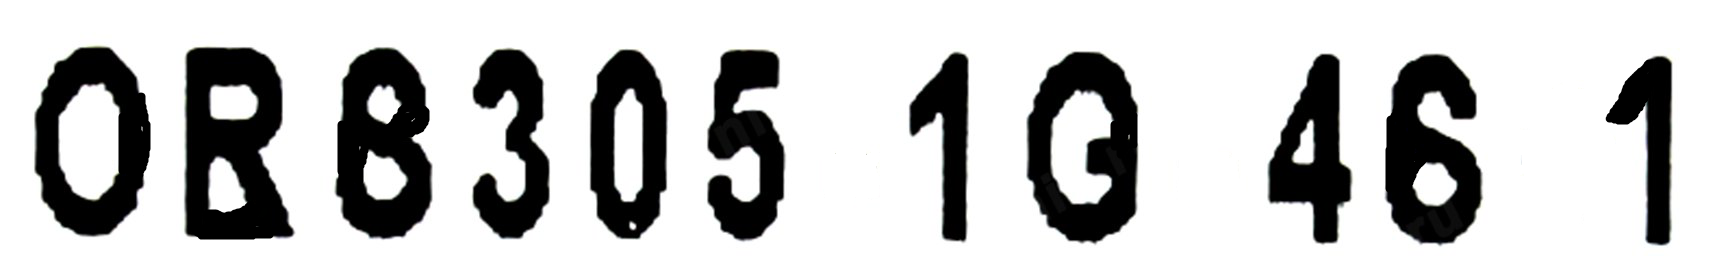

In [ ]:
# Вывожу изначальную картинку
image

In [ ]:
# Вывожу уменьшунную и инвертированную картинку
test

In [ ]:
# Подразумеваю, что между цифрами есть "столбец" пустоты, тогда отделю цифры через них
# Алгоритм работает так:
#   Прохожу по всем столбцам картинки и ищу на ней белый пиксель
#   если он есть, значит тут начинается или кончается цифра
#   Если цифра не найдена и найден белый пиксель, отмечаю, что найдена цифра
#   Если цифра найдена и не найден белый пиксель, то отмечаю, что цифра больше
#   не найдена и добавляю цифру в лист с некоторыми изменениями
#   * привожу к размеру 28х28

i = 0
digits = []

# Флаг, что найдена цифра на картинке
digit_found = False
# Индексы начала и конца цифры на картинке
digit_start, digit_end = 0, 0
# Прохожу по всем столбцам
while i < 175:
  # Флаг, что был белый пиксель
  on_digit = False
  # Прохожу по всем строкам столбца
  for j in range(28):
    # Если есть белый пиксель
    if image_array[j, i] > 0.1:
      # Если не найдена цифра, отмечаю это и отмечаю начало цифры
      if not digit_found:
        digit_found = True
        digit_start = i
      # Отмечаю, что найден белый пиксель
      on_digit = True
      break
  # Если белый пиксель не найден и найдено число
  # отмечаю конец цифры, преобразую её в 28х28 массив
  # и добавляю в лист цифр в картинке
  if (not on_digit) & digit_found:
    digit_found = False
    digit_end = i
    temp_digit = image_array[:,digit_start:digit_end]
    digit_tmp = np.full((28, 28, 1), 0)
    # print(len(temp_digit[0]))
    copy_start = int((28 - len(temp_digit[0]))/2)
    for k in range(copy_start, copy_start + len(temp_digit[0])):
      for l in range(28):
        digit_tmp[l][k] = temp_digit[l][k-copy_start]
    digits.append(digit_tmp)
  i += 1

print(len(digits))

11


In [ ]:
result = model.predict(np.array(digits))

ans = ""
for case in np.split(result, len(digits)):
  predicted = np.argmax(case)
  ans += str(predicted)

1/1 [==============================] - 0s 96ms/step


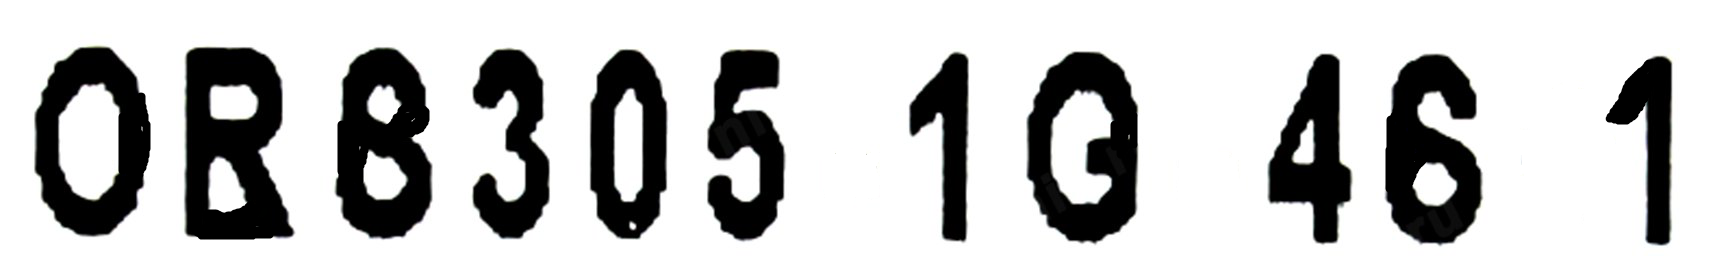

In [ ]:
image

In [ ]:
ans

'08838510481'